In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from stepping_comparison import SineGordonIntegrator, compare_methods, analytical_solution

I've tried reimplemnting some very familiar methods for the finite-difference approximation for the sine-Gordon equation

$u_{tt} = \Delta u - m \sin(u) $
under constraints


$u(x,y,0) = f(x,y)$


$u_t(x,y,0) = g(x,y)$

I've had a hard time finding work explaining analytical solutions to the sine-Gordon equation. It turns out most work for the sine-Gordon equation in 2+1 dimensions relies on "Numerical solutions of a damped Sine-Gordon equation in two space variables" a work from 1995 by Djidjeli et al.

So I've tried reproducing some solutions plots from "Numerical solution of two-dimensional nonlinear sine-Gordon equation
using localized method of approximate particular solutions" by Su from 2019. It's not using exactly finite difference timestepping but a method enhanced by splines. The reason why I'm mentioning this specific work is that "Long-time Integration of Nonlinear Wave Equations with Neural Operators" (the paper you suggested) mentions the LMAPS method that's worked out in the paper from 2019.

Now, it's a little unfortunate that the Klein-Gordon and sine-Gordon equations do not posssess a plethora of analytical solutions in 2+1 dimensions (ie. it's not a popular problem) -- so to start I'll stay with the 1996 work's analytical solution to show convergence of the method I'm building.

![title](img/sG-err-comp.png)

This shows the 2019 work's numerical solution and residual. We'll try and see how close we can get there.

What we're solving here:

$$u_{tt} = \Delta - \sin(u)$$

$$u_x(y,t) = v(y, t) \\ u_y(x, t) = w(x, t) $$ on the square domain boundary.

The solution may be derived analytically with a travelling wave Ansatz $\xi = a x + b y + \omega t$ which will yield under some assumptions


$u(x,y,t) = 4 \arctan(\exp(x+y-t))$

as an analytical solution.



I've worked on simple methods and have been looking around towards more (higher order) methods: simple explicit Euler, leap-frog and Stormer-Verlet -- I mostly did this to familiarize myself with the codebase of Louis's.

In [3]:
# main parameters defined in the 1995 work
L = 7 
T = 30
nt = 1001
nx, ny = 130, 130
dt = T / nt

solver = SineGordonIntegrator(L, T, nt, nx, ny,)
solver.evolve()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1261.21it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1330.05it/s]


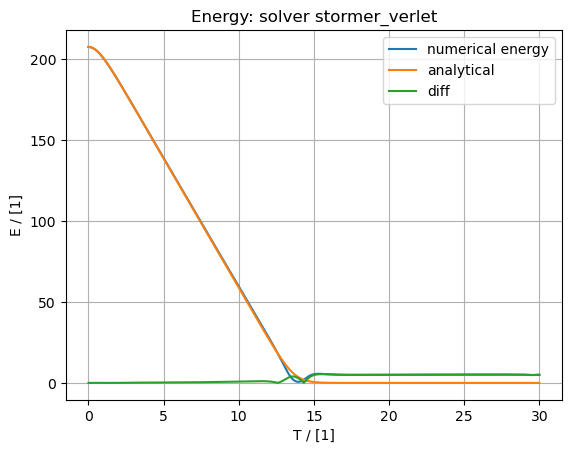

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 880.15it/s]


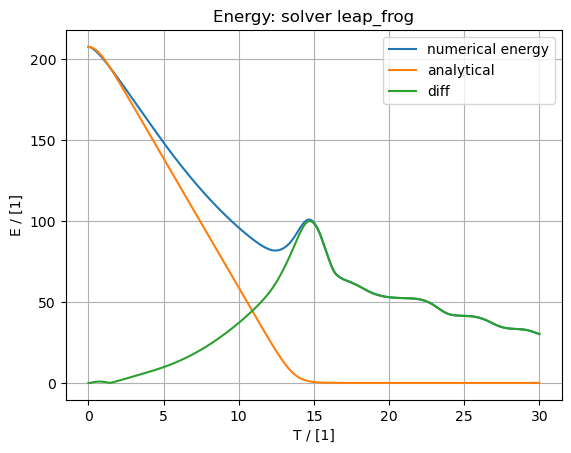

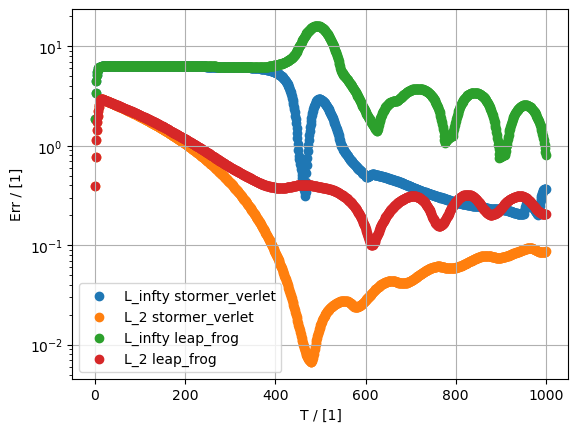

In [4]:
compare_methods()

This does not look too great for our solver. $L_{\infty}$ norm looks a little too steep, even for the Stormer-Verlet method.

However, the residual picture _does_ look similar to the LMAPS paper from 2019:

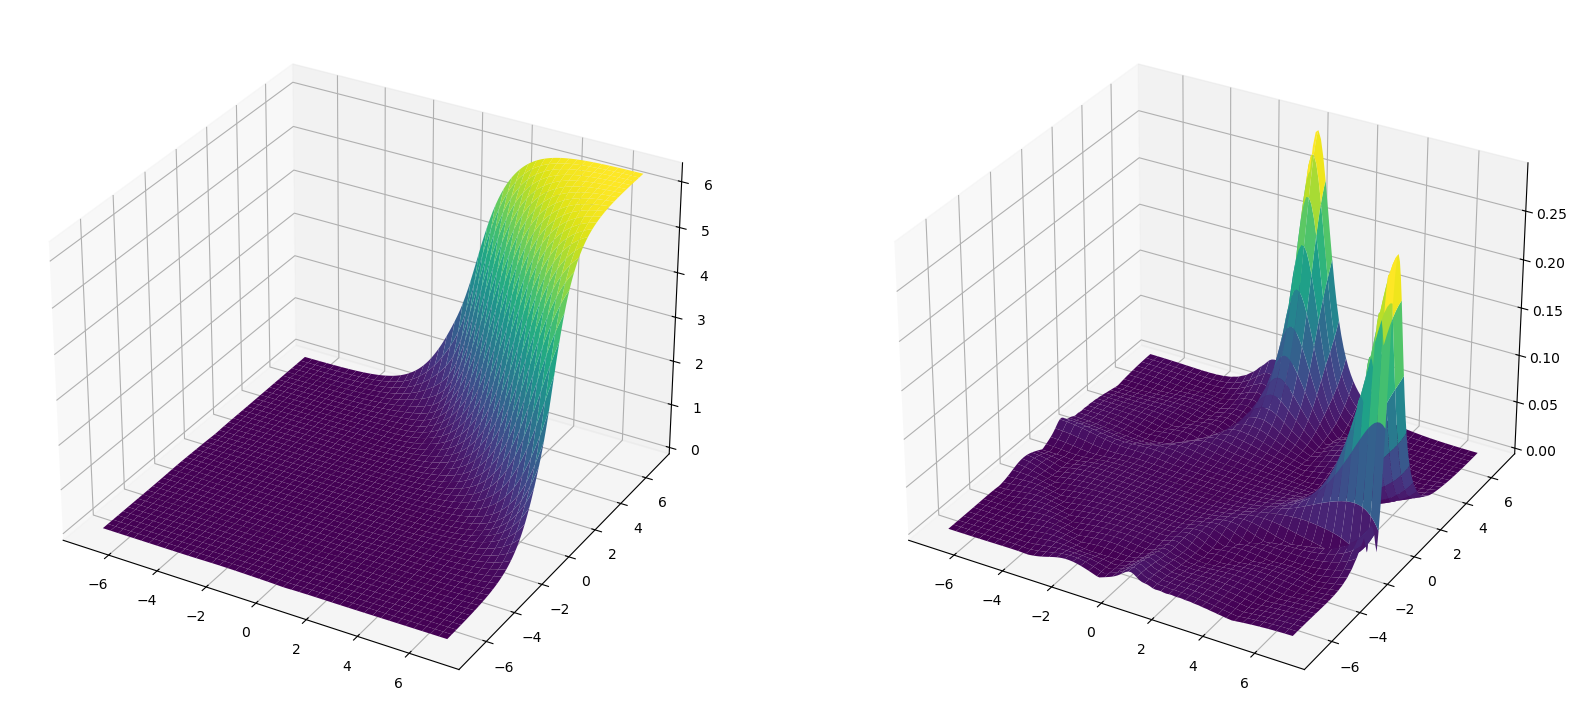

In [8]:
fig, axs = plt.subplots(figsize=(20, 20),nrows=1, ncols=2, subplot_kw={"projection":'3d'})
axs[0].plot_surface(solver.X[1:-1,1:-1], solver.Y[1:-1,1:-1], (solver.u[234][1:-1, 1:-1]), cmap='viridis')
axs[1].plot_surface(solver.X[1:-1,1:-1], solver.Y[1:-1,1:-1],
                    np.abs(solver.u[234][1:-1, 1:-1] - analytical_solution(solver.X[1:-1,1:-1], solver.Y[1:-1,1:-1], solver.dt * 234)), cmap='viridis')

The Stormer-Verlet solver seems to have similar problems with nonlinearities like the LMAPS solver.

The question now is where we (I) should pour resources: I've looked at several things that may seem promising with respect to enhancing precision and ability to handle the nonlinear nature of our model.

- split operator methods (pseudo-spectral methods) -- even though it's not clear how well this applies here
- RBF-FD: Implement "vanilla" finite elements -- introduce radial basis functions that transform our problem space
- higher-order integrators: unlikely

In any case, I'll get more to implementing the equation in Louis's code, I just wanted to have an overview of the methods and get myself back up to speed with respect to numerical methods and hardness of the nonlinear wave equation.